### **Understanding about the 'Subplots' in matplotlib**

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import ast

df = pd.read_csv('D:\\python Programming\\DataSets\\data_jobs.csv')

**Performing the cleanup**

In [2]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

**Potting single plots first**

<Axes: xlabel='job_title_short'>

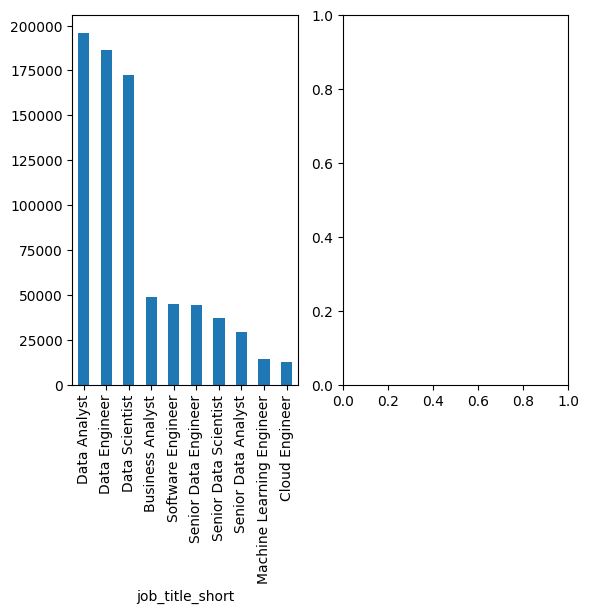

In [11]:
fig,ax = plt.subplots(1,2)
df['job_title_short'].value_counts().plot(kind = 'bar', ax = ax[0])

There are no changes in the plotting because there is no another plot added

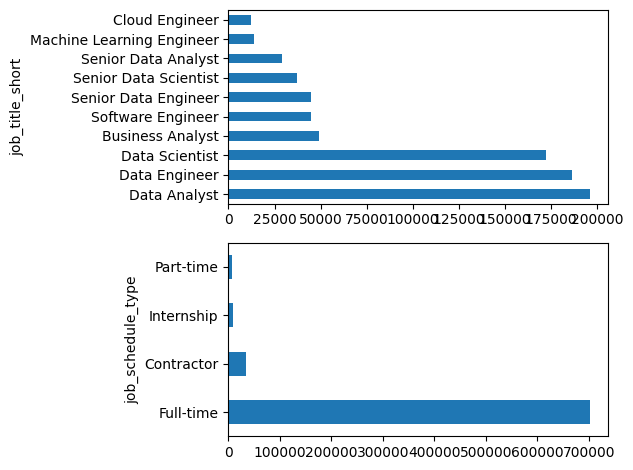

In [24]:
fig,ax = plt.subplots(2,1)
df['job_title_short'].value_counts().plot(kind = 'barh', ax = ax[0])
df['job_schedule_type'].value_counts().sort_values(ascending=False).head(4).plot(kind ='barh', ax=ax[1])
# fix the overlap
fig.tight_layout()
plt.show()

**Alternative way to use the subplots using matplotlib**

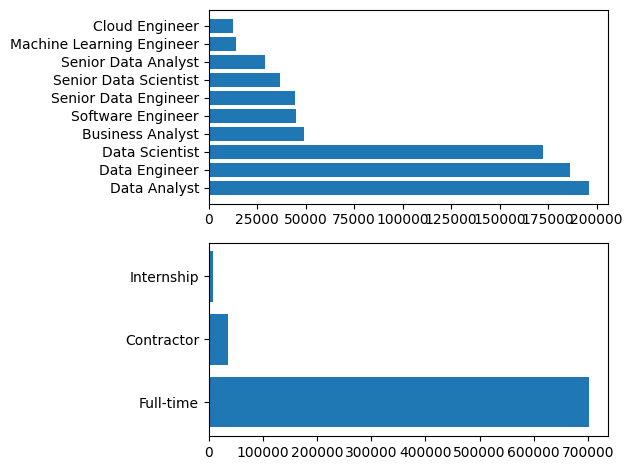

In [31]:
fig,ax = plt.subplots(2,1)
ax[0].barh(df['job_title_short'].value_counts().index,df['job_title_short'].value_counts())
ax[1].barh(df['job_schedule_type'].value_counts().head(3).index,df['job_schedule_type'].value_counts().head(3))
fig.tight_layout()

In [32]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
293,codecommit,Business Analyst,1
2233,xamarin,Machine Learning Engineer,1
1087,mlr,Machine Learning Engineer,1


In [38]:
df['job_title_short']

0         Senior Data Engineer
1                 Data Analyst
2                Data Engineer
3                Data Engineer
4                Data Engineer
                  ...         
785736       Software Engineer
785737            Data Analyst
785738        Business Analyst
785739           Data Engineer
785740       Software Engineer
Name: job_title_short, Length: 785741, dtype: object

In [41]:
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']

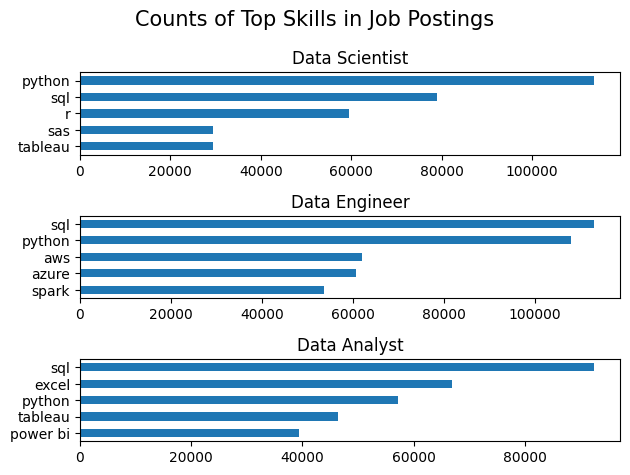

In [42]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout() # fix the overlap
plt.savefig('16.png')
plt.show()

<Figure size 640x480 with 0 Axes>